Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharingПризнаки:1.satisfaction_level

1.Satisfaction_level- Уровень удовлетворенности работой 

2.Last_evaluation - Время с момента последней оценки в годах 

3.number_projects - Количество проектов, выполненных за время работы 

4.average_monthly_hours - Среднее количество часов на рабочем месте в месяц 

5.time_spend_company - Стаж работы в компании в годах 

6.work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником 

7.left - уволился ли сотрудник 

8.promotion_last_5years - повышался ли сотрудник за последние пять лет

9.department - отдел в котором работает сотрудник 

10.salary - относительный уровень зарплаты


Требуется выполнить следующее задание:

# Задание

#1. Загрузите файл HR.csv в pandas dataframe (5)

#2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение) (10)

#3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименеескоррелированные переменные (10)

#4. Рассчитайте сколько сотрудников работает в каждом департаменте (5)

#5. Показать распределение сотрудников по зарплатам (5)

#6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности (5)

#7. Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом (10)

#8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности) (10):
    ● Доля сотрудников с повышением за последние 5 лет
    ● Средняя степень удовлетворенности
    ● Среднее количество проектов
    
#9. Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки (20)

#10. Загрузить jupyter notebook с решение на github и прислать ссылку (5)


Итого - максимум #85 баллов

Для зачета необходимо набрать минимум #55

In [473]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем файл HR.csv в pandas dataframe (5 баллов)

In [474]:
# Загружаем файл HR.csv в pandas dataframe (5 баллов)
df_HR = pd.read_csv('HR.csv', sep=',')
df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [475]:
# Сначала получим некоторую информацию о датафрейме HR благодаря методу info:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


 # Рассчитываем основные статистики для переменных: (10 баллов)

In [476]:
# Рассчитываем основные статистики для переменных: (10 баллов)
# После ознакомления с датафреймом, делаем выводы, 
# что основние статистики мы будем считать для всех метрик кроме:
# 6.Work_accident, 7.Left, 8.Promotion_last_5years, 9.Department и 10.Salary


In [477]:
# cреднее, медиана, мода,  мин/макс, сред.отклонение

# 1.Satisfaction_level- Уровень удовлетворенности работой 

# 2.Last_evaluation - Время с момента последней оценки в годах 

# 3.Number_projects - Количество проектов, выполненных за время работы

# 4.Average_monthly_hours - Среднее количество часов на рабочем месте в месяц 

# 5.Time_spend_company - Стаж работы в компании в годах 


### 1.Satisfaction_level - Уровень удовлетворенности работой 

In [478]:
print('Максимальный уровень удовлетворенности:', df_HR['satisfaction_level'].max())
print('Минимальный уровень удовлетворенности:', df_HR['satisfaction_level'].min())
satisfaction_range = df_HR['satisfaction_level'].max() - df_HR['satisfaction_level'].min()
print('Размах в уровне удовлетворенности:', satisfaction_range)
print('Среднеарифметический уровень удовлетворенности:', df_HR['satisfaction_level'].mean())
print('Мода по уровню удовлетворенности:', df_HR['satisfaction_level'].mode()[0])
print('Медиана уровню удовлетворенности:', df_HR['satisfaction_level'].median())
print('СКО по уровню удовлетворенности:',  df_HR['satisfaction_level'].std())
print('Дисперсия по уровню удовлетворенности:', df_HR['satisfaction_level'].var())

print('Первый и третий квартили о уровню удовлетворенности:')
print(df_HR['satisfaction_level'].quantile([0.25, 0.75]))

Максимальный уровень удовлетворенности: 1.0
Минимальный уровень удовлетворенности: 0.09
Размах в уровне удовлетворенности: 0.91
Среднеарифметический уровень удовлетворенности: 0.6128335222348166
Мода по уровню удовлетворенности: 0.1
Медиана уровню удовлетворенности: 0.64
СКО по уровню удовлетворенности: 0.2486306510611418
Дисперсия по уровню удовлетворенности: 0.061817200647087255
Первый и третий квартили о уровню удовлетворенности:
0.25    0.44
0.75    0.82
Name: satisfaction_level, dtype: float64


### 2.Last_evaluation - Время с момента последней оценки в годах 

In [479]:
print('Максимальное время с момента последней оценки (в годах): ', df_HR['last_evaluation'].max())
print('Минимальное время с момента последней оценки (в годах):', df_HR['last_evaluation'].min())
last_evaluation_range = df_HR['last_evaluation'].max() - df_HR['last_evaluation'].min()
print('Размах во времени с момента последней оценки (в годах):', last_evaluation_range)
print('Среднеарифметическое время с момента последней оценки (в годах):', df_HR['last_evaluation'].mean())
print('Мода по времени с момента последней оценки (в годах):', df_HR['last_evaluation'].mode()[0])
print('Медиана по времени с момента последней оценки (в годах):', df_HR['last_evaluation'].median())
print('СКО по времени с момента последней оценки (в годах):',  df_HR['last_evaluation'].std())
print('Дисперсия по времени с момента последней оценки (в годах):', df_HR['last_evaluation'].var())

print('Первый и третий квартили по времени с момента последней оценки (в годах):')
print(df_HR['last_evaluation'].quantile([0.25, 0.75]))

Максимальное время с момента последней оценки (в годах):  1.0
Минимальное время с момента последней оценки (в годах): 0.36
Размах во времени с момента последней оценки (в годах): 0.64
Среднеарифметическое время с момента последней оценки (в годах): 0.7161017401159978
Мода по времени с момента последней оценки (в годах): 0.55
Медиана по времени с момента последней оценки (в годах): 0.72
СКО по времени с момента последней оценки (в годах): 0.17116911062327592
Дисперсия по времени с момента последней оценки (в годах): 0.02929886443156327
Первый и третий квартили по времени с момента последней оценки (в годах):
0.25    0.56
0.75    0.87
Name: last_evaluation, dtype: float64


### 3.Number_projects - Количество проектов, выполненных за время работы

In [480]:
print('Максимальное количество проектов, выполненных за время работы: ', df_HR['number_project'].max())
print('Минимальное количество проектов, выполненных за время работы:', df_HR['number_project'].min())
number_project_range = df_HR['number_project'].max() - df_HR['number_project'].min()
print('Размах в количестве проектов, выполненных за время работы:', number_project_range)
print('Среднеарифметическое количество проектов, выполненных за время работы:', df_HR['number_project'].mean())
print('Мода по количеству проектов, выполненных за время работы:', df_HR['number_project'].mode()[0])
print('Медиана по количеству проектов, выполненных за время работы:', df_HR['number_project'].median())
print('СКО по количеству проектов, выполненных за время работы:',  df_HR['number_project'].std())
print('Дисперсия по количеству проектов, выполненных за время работы:', df_HR['number_project'].var())

print('Первый и третий квартили по количеству проектов, выполненных за время работы:')
print(df_HR['number_project'].quantile([0.25, 0.75]))

Максимальное количество проектов, выполненных за время работы:  7
Минимальное количество проектов, выполненных за время работы: 2
Размах в количестве проектов, выполненных за время работы: 5
Среднеарифметическое количество проектов, выполненных за время работы: 3.80305353690246
Мода по количеству проектов, выполненных за время работы: 4
Медиана по количеству проектов, выполненных за время работы: 4.0
СКО по количеству проектов, выполненных за время работы: 1.2325923553183857
Дисперсия по количеству проектов, выполненных за время работы: 1.5192839143893255
Первый и третий квартили по количеству проектов, выполненных за время работы:
0.25    3.0
0.75    5.0
Name: number_project, dtype: float64


### 4.Average_monthly_hours - Среднее количество часов на рабочем месте в месяц

In [481]:
print('Максимальное количество часов на рабочем месте в месяц (по среднему показателю на человека):', df_HR['average_montly_hours'].max())
print('Минимальное количество часов на рабочем месте в месяц (по среднему показателю на человека):', df_HR['average_montly_hours'].min())
average_montly_hours_range = df_HR['average_montly_hours'].max() - df_HR['average_montly_hours'].min()
print('Размах в количестве часов на рабочем месте в месяц (по среднему показателю на человека):', average_montly_hours_range)
print('Среднеарифметическое количество часов на рабочем месте в месяц (по среднему показателю на человека):', df_HR['average_montly_hours'].mean())
print('Мода по количеству часов на рабочем месте в месяц (по среднему показателю на человека):', df_HR['average_montly_hours'].mode()[0])
print('Медиана по количеству часов на рабочем месте в месяц (по среднему показателю на человека):', df_HR['average_montly_hours'].median())
print('СКО по количеству часов на рабочем месте в месяц (по среднему показателю на человека):',  df_HR['average_montly_hours'].std())
print('Дисперсия по количеству часов на рабочем месте в месяц (по среднему показателю на человека):', df_HR['average_montly_hours'].var())

print('Первый и третий квартили по часов на рабочем месте в месяц (по среднему показателю на человека):')
print(df_HR['average_montly_hours'].quantile([0.25, 0.75]))

Максимальное количество часов на рабочем месте в месяц (по среднему показателю на человека): 310
Минимальное количество часов на рабочем месте в месяц (по среднему показателю на человека): 96
Размах в количестве часов на рабочем месте в месяц (по среднему показателю на человека): 214
Среднеарифметическое количество часов на рабочем месте в месяц (по среднему показателю на человека): 201.0503366891126
Мода по количеству часов на рабочем месте в месяц (по среднему показателю на человека): 135
Медиана по количеству часов на рабочем месте в месяц (по среднему показателю на человека): 200.0
СКО по количеству часов на рабочем месте в месяц (по среднему показателю на человека): 49.943099371284305
Дисперсия по количеству часов на рабочем месте в месяц (по среднему показателю на человека): 2494.313174809979
Первый и третий квартили по часов на рабочем месте в месяц (по среднему показателю на человека):
0.25    156.0
0.75    245.0
Name: average_montly_hours, dtype: float64


### 5.Time_spend_company - Стаж работы в компании в годах 

In [482]:
print('Максимальный стаж работы в компании (в годах):', df_HR['time_spend_company'].max())
print('Минимальный стаж работы в компании (в годах):', df_HR['time_spend_company'].min())
time_spend_company_range = df_HR['time_spend_company'].max() - df_HR['time_spend_company'].min()
print('Размах по стажу работы в компании (в годах):', time_spend_company_range)
print('Среднеарифметический стаж работы в компании (в годах):', df_HR['time_spend_company'].mean())
print('Мода по стажу работы в компании (в годах):', df_HR['time_spend_company'].mode()[0])
print('Медиана по стажу работы в компании (в годах):', df_HR['time_spend_company'].median())
print('СКО по стажу работы в компании (в годах):',  df_HR['time_spend_company'].std())
print('Дисперсия по стажу работы в компании (в годах):', df_HR['time_spend_company'].var())

print('Первый и третий квартили по стажу работы в компании (в годах):')
print(df_HR['time_spend_company'].quantile([0.25, 0.75]))

Максимальный стаж работы в компании (в годах): 10
Минимальный стаж работы в компании (в годах): 2
Размах по стажу работы в компании (в годах): 8
Среднеарифметический стаж работы в компании (в годах): 3.498233215547703
Мода по стажу работы в компании (в годах): 3
Медиана по стажу работы в компании (в годах): 3.0
СКО по стажу работы в компании (в годах): 1.4601362305354546
Дисперсия по стажу работы в компании (в годах): 2.1319978117222864
Первый и третий квартили по стажу работы в компании (в годах):
0.25    3.0
0.75    4.0
Name: time_spend_company, dtype: float64


# Рассчитываем и визуализируем корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименеескоррелированные переменные (10 баллов)

In [483]:
# Создаем новый датафрейм исключительно с количественными переменными:
df_HR_short =df_HR.filter(items=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company'])
df_HR_short.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [484]:
#Строим корреляционную матрицу
df_HR_corr = df_HR_short.corr()
df_HR_corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [485]:
# Мы видим 2 САМЫЕ БОЛЬШЫЕ в датасете, но тем не менее средние корреляции таких метрик как: 
# 1) average_montly_hours и number_project - те.е среднего количества времени работы и количества завершенных проектов(0.417211)
# 2) last_evaluation и number_project - т.е. время с последней оценки и количеством проектов (0.34933)

# есть небольшая корреляция таких метрик как время с последней оценки и среднего количества времени работы: 
# 3) last_evaluation и average_montly_hours (0.339742)
# вижу также совсем слабую корреляцию таких метрик как стаж и количество проектов: 
# 4) time_spend_company и number_project (0.196786)

# НАИМЕНЕЕ скорелированными метриками мы можем считать:
# 5) satisfaction_level и time_spend_company - т.е. удовлетваренность со стажем работы (-0.100866)
# 6) satisfaction_level и average_montly_hours - т.е. удовлетворенность с количеством часов работы в месяц (среднее на каждого сотрудника) (-0.020048)

<Figure size 200x1000 with 0 Axes>

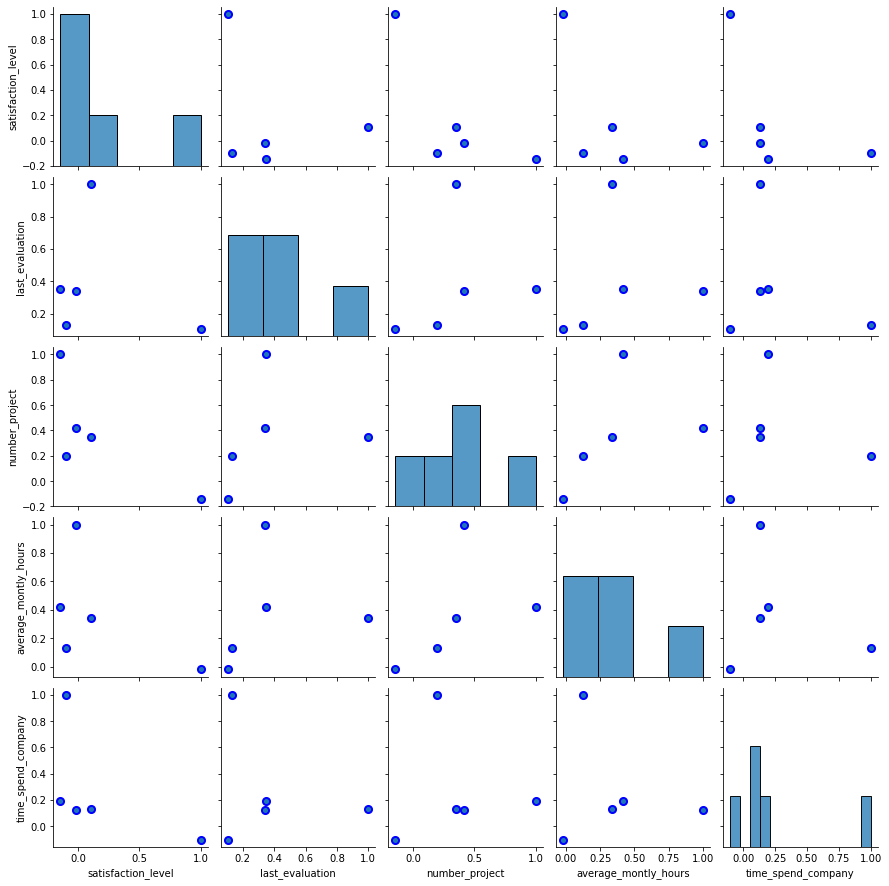

In [487]:
#Визуализируем показания корреляции
plt.figure(figsize=(20,100), dpi= 10)
sns.pairplot(df_HR_corr, kind="scatter", plot_kws=dict(s=50, edgecolor="blue", linewidth=2.0))
plt.show()

# Рассчитайте сколько сотрудников работает в каждом департаменте (5 баллов)

In [488]:
#Создаем счетчик сотрудников в отдельном столбце датасета, чтобы упростить подсчет их количества 
df_HR['collegue']= 1
df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,collegue
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [489]:
# Для простоты сократим датасет
df_HR_departments = df_HR.filter(items=['department','collegue','salary'])
df_HR_departments

,department,collegue,salary
0,sales,1,low
1,sales,1,medium
2,sales,1,medium
3,sales,1,low
4,sales,1,low
...,...,...,...
14994,support,1,low
14995,support,1,low
14996,support,1,low
14997,support,1,low


In [490]:
# Посмотрим, сколько человек работает в каждом департаменете и заодно посмотрим на разбиение по зарплатам этих сотрудников
df_HR_counter_department = df_HR_departments.pivot_table(index='department', columns='salary', aggfunc='sum').fillna(0)
df_HR_counter_department.head(10)

collegue             
salary          high   low medium
department                       
IT                83   609    535
RandD             51   364    372
accounting        74   358    335
hr                45   335    359
management       225   180    225
marketing         80   402    376
product_mng       68   451    383
sales            269  2099   1772
support          141  1146    942
technical        201  1372   1147

In [491]:
# Создадим счетчик counter, который и будет показывать нам сколько сотрудников работает в каждом отделе.
df_HR_counter_department['counter']=df_HR_counter_department.sum(axis=1)
df_HR_counter_department.head(10)

collegue              counter
salary          high   low medium        
department                               
IT                83   609    535    1227
RandD             51   364    372     787
accounting        74   358    335     767
hr                45   335    359     739
management       225   180    225     630
marketing         80   402    376     858
product_mng       68   451    383     902
sales            269  2099   1772    4140
support          141  1146    942    2229
technical        201  1372   1147    2720

# Показать распределение сотрудников по зарплатам (5 баллов)


In [492]:
# Визуализируем распределение по зарплатам между сотрудниками
df_HR_salary = df_HR.filter(items=['collegue','salary']).groupby('salary').sum()
df_HR_salary

,collegue
salary,
high,1237
low,7316
medium,6446


<AxesSubplot:title={'center':'Распределение зарплат по сотрудникам'}, ylabel='Уровень зарплаты'>

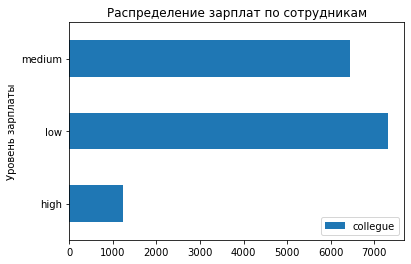

In [493]:
# Мы наблюдаем не совсем нормальное распределение зарплаты из которого следует, что:
# большинство сотрудников получет зарплату низкую, у чуть меньшего числа зарплата средняя и у совсем небольшого числа людей зарплата высокая. 
df_HR_salary.plot(kind='barh', title='Распределение зарплат по сотрудникам',ylabel='Сотрудники', xlabel='Уровень зарплаты')

# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности (5 баллов)

<AxesSubplot:title={'center':'Распределение зарплат по сотрудникам'}, xlabel='Уровень зарплаты', ylabel='Сотрудники'>

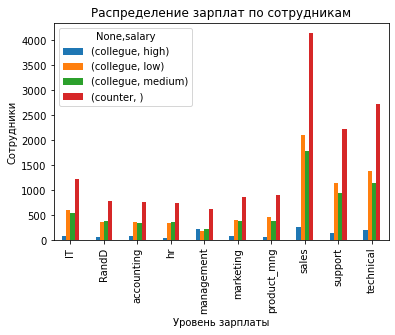

In [494]:
# Рассмотрим распределение зарплат в каждом из департаментов с помощью барчарта
df_HR_counter_department.plot(kind='bar', title='Распределение зарплат по сотрудникам',ylabel='Сотрудники', xlabel='Уровень зарплаты')


In [495]:
#Из барчарта выше мы видим, что больше всего зарплат/сотрудников сосредоточено в департаменте продаж (sales), а меньше всего в менеджменте (management), однако в менеджменте больше всего высоких зраплат и меньше всего низких.


# Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом (10 баллов)

In [496]:
df_HR_salary_and_hours = df_HR.filter(items=['collegue','salary','average_montly_hours'])
df_HR_salary_and_hours.head()

,collegue,salary,average_montly_hours
0,1,low,157
1,1,medium,262
2,1,medium,272
3,1,low,223
4,1,low,159


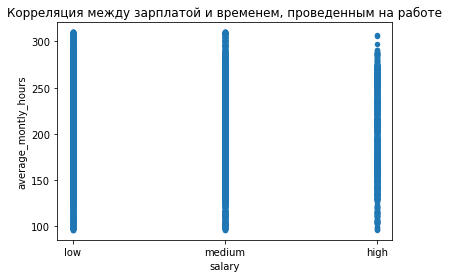

In [497]:
#Проверим, зависит ли зарплата от проведенных на работе часов
df_HR_salary_and_hours.plot(kind='scatter', 
        x='salary', 
        y='average_montly_hours', 
        title='Корреляция между зарплатой и временем, проведенным на работе')
plt.show()

### По данным нашего скаттерплота выше мы можем сказать, что время проведенное на работе в случае высокой зарплаты чаще ниже, чем в случае с низкой и средней зарплатой.
### То есть гипотезу уже на начальном этапе можно отклонить.

# Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности) (10 баллов):
    ● Доля сотрудников с повышением за последние 5 лет
    ● Средняя степень удовлетворенности
    ● Среднее количество проектов

In [498]:
df_HR_left = df_HR.filter(items=['satisfaction_level','left','promotion_last_5years'])
df_HR_left.head()

,satisfaction_level,left,promotion_last_5years
0,0.38,1,0
1,0.80,1,0
2,0.11,1,0
3,0.72,1,0
4,0.37,1,0


In [499]:
# Рассчитаем длю сотрудников с повышением за последние 5 лет
df_HR_promotion_percentage = (df_HR_left.groupby('promotion_last_5years').size() / len(df_HR_left))*100 
df_HR_promotion_percentage.head()

promotion_last_5years
0    97.873192
1     2.126808
dtype: float64

In [500]:
# Доля сотрудников с повышением за последние 5 лет равна: 2.12 % 

In [501]:
# Рассчитаем уволившихся (с повышением за последние 5 лет) и не уволившихся (с повышением за последние 5 лет)
df_HR_promotion_left = (df_HR_left.groupby(['promotion_last_5years', 'left' ]).size() / len(df_HR_left))*100 
df_HR_promotion_left.head()

promotion_last_5years  left
0                      0       74.191613
                       1       23.681579
1                      0        2.000133
                       1        0.126675
dtype: float64

### Доля сотрудников УВОЛИВШИХСЯ с повышением за последние 5 лет равна: 0.12 % 
### Доля сотрудников НЕ УВОЛИВШИХСЯ с повышением за последние 5 лет равна: 2 % 

In [502]:
df_HR_left['counter_satisfaction'] = 1

In [503]:
# Посчитаем общие данные удолетворенностью по уволившимся и не уволившимся сотрудникам, все, что будет идти ниже 
# понадобится нам для расчетов
df_HR_left_pivot = df_HR_left.pivot_table(index='left', columns='counter_satisfaction', values='satisfaction_level', aggfunc='sum').fillna(0)
df_HR_left_pivot.head(5)
# Далее мы рассчитываем общее количество удовлетворенности в разрезе уволившихся (1) и не уволившихся(1) 
# - нам это пригодится для дальнейших рассчетов

counter_satisfaction,1
left,
0,7620.30
1,1571.59


In [504]:
# Далее мы рассчитываем датафоейм по общему количеству людей в разрезе удовлетворенности на уволившихся и не уволившихся 
# - делаем это с помощью расчетов в датафрейме (столбец number)
df_HR_left_satisfied_pivot = df_HR_left.pivot_table(index='left', columns='satisfaction_level', values='counter_satisfaction', aggfunc='sum').fillna(0)
df_HR_left_satisfied_pivot['number_of_people']=df_HR_left_satisfied_pivot.sum(axis=1)
df_HR_left_satisfied_pivot

satisfaction_level,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,...,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0,number_of_people
left,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,26.0,51.0,63.0,73.0,78.0,67.0,63.0,...,178.0,169.0,167.0,181.0,203.0,176.0,183.0,172.0,111.0,11428.0
1,195.0,358.0,335.0,4.0,3.0,10.0,3.0,1.0,5.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3571.0


In [505]:
# Для наглядности уменьшаем наш датафрейм, оставляя только количество людей в разрезе условия (уволился (1) или не уволился(0))
df_HR_left_satisfied_pivot_filtered = df_HR_left_satisfied_pivot.filter(items=['left','number_of_people'])
df_HR_left_satisfied_pivot_filtered

satisfaction_level,number_of_people
left,
0,11428.0
1,3571.0


In [506]:
# Объединяем 2 получившихся датафрейма
df_HR_left_satisfied_all= df_HR_left_pivot.merge(df_HR_left_satisfied_pivot_filtered, how ='left', on ='left')
df_HR_left_satisfied_all

,1,number_of_people
left,,
0,7620.30,11428.0
1,1571.59,3571.0


In [507]:
# Для облегчения восприятия меняем название столбцов
df_HR_left_satisfied_all_2 = df_HR_left_satisfied_all.set_axis(['number','number_of_people' ], axis='columns', inplace=False)
df_HR_left_satisfied_all_2

,number,number_of_people
left,,
0,7620.30,11428.0
1,1571.59,3571.0


In [508]:
# Разрабатываем простую функцию применимую к 2-м столбцам датафрейма, используем apply
def satisfaction_left_or_stayed(row):
    return row['number']/row['number_of_people']

In [509]:
# Применяем функцию к датафрейму и получаем необходимые нам данные удовлетворенность в разрезе уводившихся и не уволившихся.
df_HR_left_satisfied_all_2['satisfaction_percentage']=df_HR_left_satisfied_all_2.apply(satisfaction_left_or_stayed, axis=1)
df_HR_left_satisfied_all_2.head()

,number,number_of_people,satisfaction_percentage
left,,,
0,7620.30,11428.0,0.666810
1,1571.59,3571.0,0.440098


### ТАКИМ ОБРАЗОМ У НАС ПОЛУЧИЛОСЬ:
### НЕ УВОЛИВШИЕСЯ: средняя удовлетворенность равна 0.66 (т.е. 66%)
### УВОЛИВШИЕСЯ: средняя удовлетворенность равна 0.44 (т.е. 44%)

In [510]:
#Чтобы вычислить среднее количество проекто в разрезе уволившихся и не уволившихся надо отобрать необходимые столбцы

df_HR_left_projects = df_HR.filter(items=['satisfaction_level','number_project','left'])
df_HR_left_projects.head()

,satisfaction_level,number_project,left
0,0.38,2,1
1,0.80,5,1
2,0.11,7,1
3,0.72,5,1
4,0.37,2,1


In [511]:
# Среднее количество проектов
# Рассчитаем сотрудников по количеству проектов
df_HR_left_projects_quantity= df_HR_left_projects.groupby(['number_project','left']).size() 
df_HR_left_projects_quantity.head(30)

number_project  left
2               0        821
                1       1567
3               0       3983
                1         72
4               0       3956
                1        409
5               0       2149
                1        612
6               0        519
                1        655
7               1        256
dtype: int64

In [512]:
# Создаем отдельный счетчик проектов в разрезе уволившихся(1) или не уволившихся(0)
df_HR_left_projects['counter_projects'] = 1
df_HR_left_projects.head()

,satisfaction_level,number_project,left,counter_projects
0,0.38,2,1,1
1,0.80,5,1,1
2,0.11,7,1,1
3,0.72,5,1,1
4,0.37,2,1,1


In [513]:
df_HR_left_projects_pivot = df_HR_left_projects.pivot_table(index='left', columns='counter_projects', values='number_project', aggfunc='sum').fillna(0)
df_HR_left_projects_pivot.head(5)

counter_projects,1
left,
0,43274
1,13768


In [514]:
# Нам уже изсестно, сколько человек уволилось и сколько не уволилось, но можем повторить рассчеты 
# Это можно проверить посредством value.counts()
df_HR_left_projects['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [515]:
# И у нас даже уже есть мини-датафрейм с этими данными, вот он:
df_HR_left_satisfied_pivot_filtered

satisfaction_level,number_of_people
left,
0,11428.0
1,3571.0


In [516]:
# Склеиваем датафреймы:
df_HR_left_projects_all= df_HR_left_projects_pivot.merge(df_HR_left_satisfied_pivot_filtered, how ='left', on ='left')
df_HR_left_projects_all

,1,number_of_people
left,,
0,43274,11428.0
1,13768,3571.0


In [517]:
# Для облегчения восприятия меняем название столбцов
df_HR_left_projects_all_2 = df_HR_left_projects_all.set_axis(['number_of_projects','number_of_people_2' ], axis='columns', inplace=False)
df_HR_left_projects_all_2

,number_of_projects,number_of_people_2
left,,
0,43274,11428.0
1,13768,3571.0


In [518]:
# Разрабатываем простую функцию применимую к 2-м столбцам датафрейма, используем apply
def projects_left_or_stayed(row):
    return row['number_of_projects']/row['number_of_people_2']

In [519]:
# Применяем функцию к датафрейму и получаем необходимые нам данные среднее колличество проектов в разрезе уволившихся и не уволившихся.
df_HR_left_projects_all_2['average_projects']=df_HR_left_projects_all_2.apply(projects_left_or_stayed, axis=1)
df_HR_left_projects_all_2.head()

,number_of_projects,number_of_people_2,average_projects
left,,,
0,43274,11428.0,3.786664
1,13768,3571.0,3.855503


### ТАКИМ ОБРАЗОМ У НАС ПОЛУЧИЛОСЬ:
### НЕ УВОЛИВШИЕСЯ: среднее количество проектов на одного сотрудника равно 3,78 проекта
### УВОЛИВШИЕСЯ: среднее количество проектов на одного сотрудника равно 3,85 проекта

# Разделим данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) 
# Оценим качество модели на тестовой выборки (20 баллов)

In [520]:
# Еще раз вспомним, какие метрики у нас есть:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  collegue               14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [521]:
# Знакомлюсь со всеми уникальными значениями столбцов (просто так, для себя):
print('Уникальные значения - уволился или нет: 0 остался, 1 - уволился:', df_HR_LDA['left'].unique())
print('Уникальные значения - уровень удовлетворенности:',df_HR_LDA['satisfaction_level'].unique())
print('Уникальные значения - последняя проверка (в годах):',df_HR_LDA['last_evaluation'].unique())
print('Уникальные значения - количество проектов на человека:',df_HR_LDA['number_project'].unique())
print('Уникальные значения - количество лет в компании:',df_HR_LDA['time_spend_company'].unique()) 
print('Уникальные значения - 0 не было инцидентов на работе, 1 - были инциденты на работе:',df_HR_LDA['Work_accident'].unique())
print('Уникальные значения - количество рабочих часов в месяц:',df_HR_LDA['average_montly_hours'].unique())
print('Уникальные значения - 0 не было повышения, 1 - было повышение:',df_HR_LDA['promotion_last_5years'].unique())

Уникальные значения - уволился или нет: 0 остался, 1 - уволился: [1 0]
Уникальные значения - уровень удовлетворенности: [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
Уникальные значения - последняя проверка (в годах): [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
Уникальные значения - количество п

In [522]:
# создадим более удобный датасет для будущего построения модели lda
data_lda = df_HR.drop(['department', 'salary','collegue'], axis=1)
data_lda.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [523]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [524]:
data_train, data_test = train_test_split(data_lda, test_size=0.2)
lda = LinearDiscriminantAnalysis()

In [525]:
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
7666,0.88,0.59,3,224,2,0,0,0
13172,0.94,0.52,5,133,3,0,0,0
10345,0.91,0.82,6,280,3,0,0,0
14654,0.81,0.98,5,245,5,0,1,0
5021,0.66,0.99,4,195,3,0,0,0
...,...,...,...,...,...,...,...,...
4292,0.50,0.97,4,269,3,0,0,0
7857,0.36,0.63,2,278,4,0,0,0
6280,0.77,0.48,4,258,4,1,0,0
6320,0.64,0.81,2,226,2,0,0,0


In [526]:
data_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
13278,0.51,0.62,4,185,3,0,0,0
10716,0.98,0.91,3,165,2,1,0,0
13551,0.77,0.54,4,139,3,1,0,0
2477,0.81,0.83,3,196,2,0,0,0
9911,0.96,0.58,5,197,4,1,0,0
...,...,...,...,...,...,...,...,...
1678,0.75,0.89,5,276,5,0,1,0
8043,0.49,0.42,2,266,3,0,0,0
13742,0.67,0.72,2,134,10,0,0,0
6210,0.98,0.96,5,183,3,1,0,0


In [527]:
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [528]:
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
7666,0.88,0.59,3,224,2,0,0
13172,0.94,0.52,5,133,3,0,0
10345,0.91,0.82,6,280,3,0,0
14654,0.81,0.98,5,245,5,0,0
5021,0.66,0.99,4,195,3,0,0
...,...,...,...,...,...,...,...
4292,0.50,0.97,4,269,3,0,0
7857,0.36,0.63,2,278,4,0,0
6280,0.77,0.48,4,258,4,1,0
6320,0.64,0.81,2,226,2,0,0


In [529]:
data_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
13278,0.51,0.62,4,185,3,0,0
10716,0.98,0.91,3,165,2,1,0
13551,0.77,0.54,4,139,3,1,0
2477,0.81,0.83,3,196,2,0,0
9911,0.96,0.58,5,197,4,1,0
...,...,...,...,...,...,...,...
1678,0.75,0.89,5,276,5,0,0
8043,0.49,0.42,2,266,3,0,0
13742,0.67,0.72,2,134,10,0,0
6210,0.98,0.96,5,183,3,1,0


In [530]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis()

In [531]:
lda.predict(data_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [532]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2995,1,0
2996,0,0
2997,0,0
2998,0,0


In [533]:
#Оценим качество модели на тестовой выборке

In [534]:
from sklearn.metrics import accuracy_score

In [535]:
accuracy_score(y_test, lda.predict(data_test))

0.7613333333333333

### ТОЧНОСТЬ МОДЕЛИ: 76,1 %

# Строим точечные графики на все, что сможем построить

<AxesSubplot:xlabel='satisfaction_level', ylabel='left'>

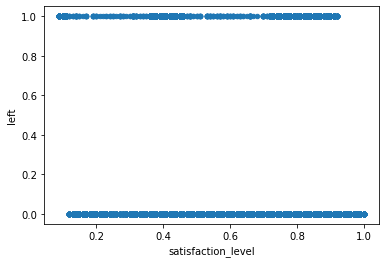

In [284]:
# Отвечаем на вопрос: есть ли связь между увольнением left и удовлетворенностью satisfaction_level?
df_HR_LDA.plot(kind='scatter', x='satisfaction_level', y='left')
# Построим точечный график
# ВЫВОД-ПРЕДПОЛОЖЕНИЕ: ТОТ, КТО НЕ УВОЛЬНЯЛСЯ БЫЛ В СРЕДНЕМ ЧУТЬ-ЧУТЬ БОЛЕЕ УДОВЛЕТВОРЕННЫМ, ЧЕМ ТОТ,
# КТО УВОЛЬНЯЛСЯ, но не критично

In [295]:
# Определим, влияет ли один параметр на другой
df_HR_LDA[['satisfaction_level', 'left']].corr(method='spearman') # коэффициент Спирмена
# Вывод - есть ниже среднего корреляция по Спирмену

,satisfaction_level,left
satisfaction_level,1.000000,-0.365842
left,-0.365842,1.000000


<AxesSubplot:xlabel='last_evaluation', ylabel='left'>

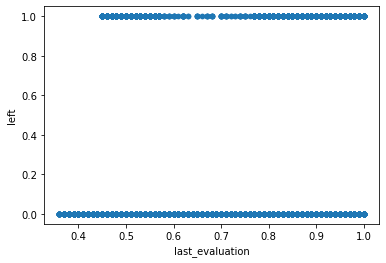

In [285]:
# Отвечаем на вопрос: есть ли связь между увольнением left и эвалюацией last_evaluation?
df_HR_LDA.plot(kind='scatter', x='last_evaluation', y='left')
# Построим точечный график
# ВЫВОД-ПРЕДПОЛОЖЕНИЕ: ТЕ, КТО УХОДИЛ НЕМНОГО ДОЛЬШЕ ЖДАЛИ ОЦЕНКИ (ЭВАЛЮАЦИИ), ЧЕМ ТЕ, ЧТО ОСТАЛИСЬ

<AxesSubplot:xlabel='number_project', ylabel='left'>

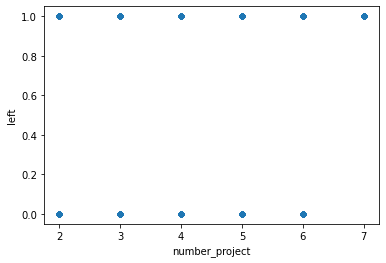

In [287]:
# Отвечаем на вопрос: есть ли связь между увольнением left и количеством проектов number_project?
df_HR_LDA.plot(kind='scatter', x='number_project', y='left')
# Построим точечный график
# ВЫВОД-ПРЕДПОЛОЖЕНИЕ: ТОТ, КТО УХОДИЛ ИМЕЛ ЧУТЬ БОЛЬШЕ ПРОЕКТОВ, ЧЕМ ТОТ, КТО ОСТАЛСЯ (ЭТОТ ЖЕ ВЫВОД-ПРЕДПОЛОЖЕНИЕ МЫ СДЕЛАЛИ РАНЕЕ
# НА ОСНОВЕ СРЕДНЕГО КОЛИЧЕСТВА ПРОЕКТОВ НА 1 УВОЛИВШЕГОСЯ СОТРУДНИКА)

<AxesSubplot:xlabel='time_spend_company', ylabel='left'>

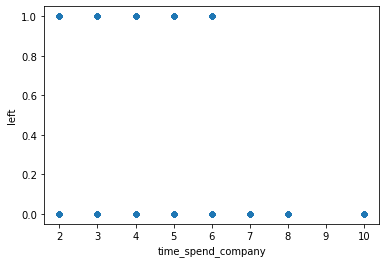

In [288]:
# Отвечаем на вопрос: есть ли связь между увольнением left и стажем в компании time_spend_company?
df_HR_LDA.plot(kind='scatter', x='time_spend_company', y='left')
# Построим точечный график
# ВЫВОД-ПРЕДПОЛОЖЕНИЕ: ТОТ, КТО УХОДИЛ ИМЕЛ МЕНЬШИЙ ОПЫТ РАБОТЫ В КОМПАНИИ, ЧЕМ ТОТ, КТО ПРОДОЛЖАЛ РАБОТАТЬ)

In [299]:
# Определим, влияет ли один параметр на другой
df_HR_LDA[['time_spend_company', 'left']].corr(method='spearman') # коэффициент Спирмена
# Вывод - есть совсем небольшая корреляция по Спирмену

,time_spend_company,left
time_spend_company,1.000000,0.268876
left,0.268876,1.000000


<AxesSubplot:xlabel='Work_accident', ylabel='left'>

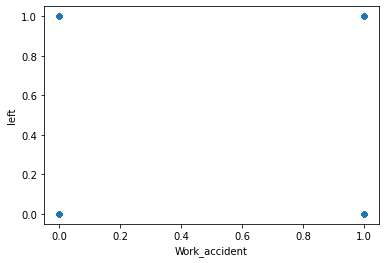

In [289]:
# Отвечаем на вопрос: есть ли связь между увольнением left и наличием инцидентов в компании Work_accident?
df_HR_LDA.plot(kind='scatter', x='Work_accident', y='left')
# Построим точечный график
# ВЫВОД-ПРЕДПОЛОЖЕНИЕ: НЕВОЗМОЖНО ТОЧНО ОТВЕТИТЬ НА ЗАДАННЫЙ ВОПРОС ТОЛЬКО С ПОМОЩЬЮ ОДНОЙ ВИЗУАЛИЗАЦИИ.

<AxesSubplot:xlabel='average_montly_hours', ylabel='left'>

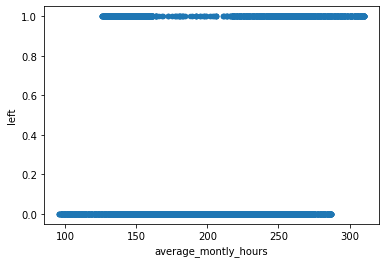

In [290]:
# Отвечаем на вопрос: есть ли связь между увольнением left и количеством часов работы в месяц average_montly_hours?
df_HR_LDA.plot(kind='scatter', x='average_montly_hours', y='left')
# Построим точечный график
# ВЫВОД-ПРЕДПОЛОЖЕНИЕ: ОЧЕВИДНО, ЧТО ТЕ, КТО УВОЛЬНЯЛСЯ РАБОТАЛ БОЛЬШЕ И ПРАКТИЧЕСКИ НЕ ИМЕЛ НЕБОЛЬШОЙ ЗАНЯТОСТИ

<AxesSubplot:xlabel='promotion_last_5years', ylabel='left'>

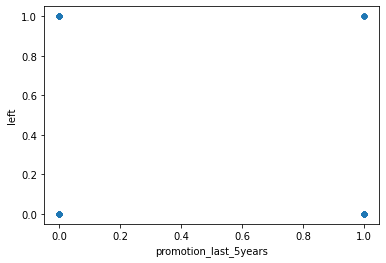

In [291]:
# Отвечаем на вопрос: есть ли связь между увольнением left и продвижением/отсутствием продвижения по службе promotion_last_5years?
df_HR_LDA.plot(kind='scatter', x='promotion_last_5years', y='left')
# Построим точечный график
# ВЫВОД-ПРЕДПОЛОЖЕНИЕ: НЕВОЗМОЖНО ТОЧНО ОТВЕТИТЬ НА ЗАДАННЫЙ ВОПРОС ТОЛЬКО С ПОМОЩЬЮ ОДНОЙ ВИЗУАЛИЗАЦИИ.

# Загрузить jupyter notebook с решение на github и прислать ссылку (5 баллов)